In [79]:
#handy functions from Data Wrangling activities
#import RentPredictionChallenge as wrangle
import datetime
from RentPredictionChallenge import *
from xgboost import XGBClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

Shape of the data set before transforming :  (12132, 40)
Shape of the data set after transforming :  (12132, 44) 

Shape of the dataset before transformation :  (12132, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate', 'HomePrice', 'x', 'y', 'z', 2015.25, 2015.5, 2015.75, 2016.25, 'Condo', 'Duplex', 'NA', 'Quadplex', 'SFR', 'Triplex']

Shape of the data set before min max scaling :  (12132, 44)

Shape of the data set post min max scaling :  (12132, 44)
Shape of the dataset after transformation :  (12132, 44)
I

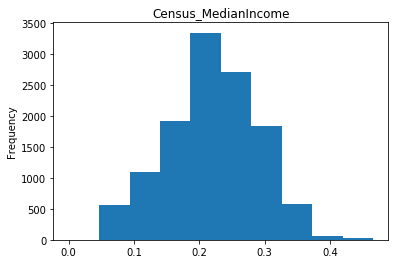


Shape of the data set before min max scaling :  (12132, 44)

Shape of the data set post min max scaling :  (12132, 44)


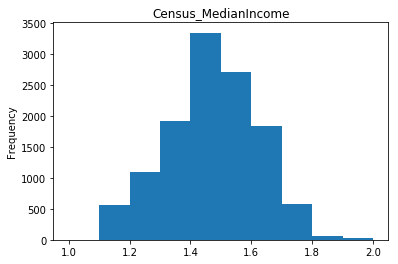


Train feature shape:  (12132, 43) (12132,)
Test feature shape:  (0, 43) (0,)


In [2]:
X,y,dummy_X,dummy_y = returnTrainTestSet(
                                boxCoxTranformation(preProcessTheData(readTheData('TestData_PA.csv'))),
                                .99999,
                                1986)

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_Me

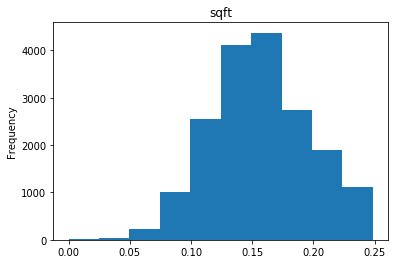


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


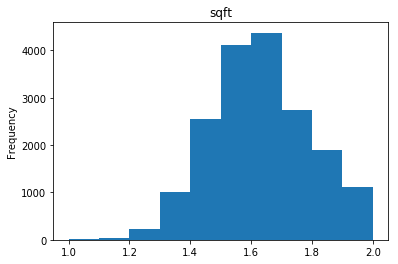


Train feature shape:  (12655, 43) (12655,)
Test feature shape:  (5424, 43) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7102875955358494


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7283716069202464
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7283690830841661
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.72843620505116
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6585773396510588
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             m

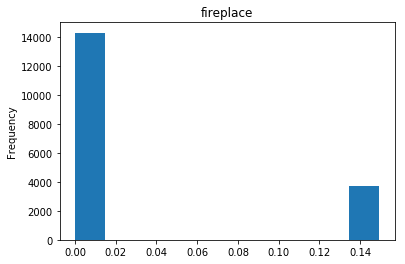


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


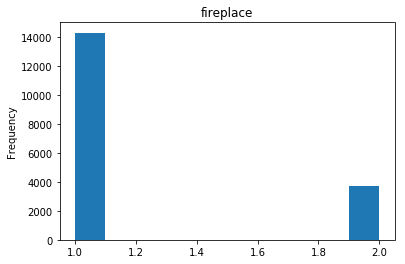


Train feature shape:  (14463, 43) (14463,)
Test feature shape:  (3616, 43) (3616,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7167066019820476


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.724279236478919
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.724279445625922
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7242936730222667
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.653656791035915
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             ma

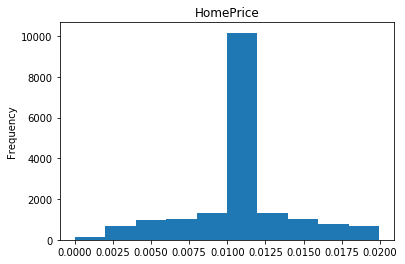


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


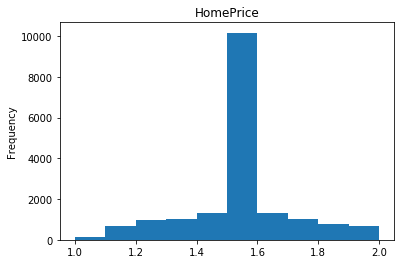


Train feature shape:  (12655, 43) (12655,)
Test feature shape:  (5424, 43) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7161977798693122


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7253968901682825
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7253974016094307
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7255040355286491
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6534754107417868
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

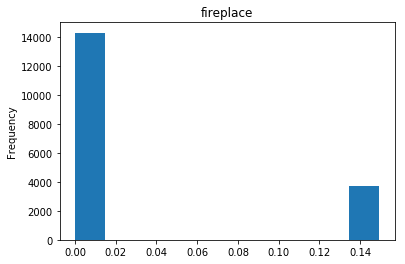


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


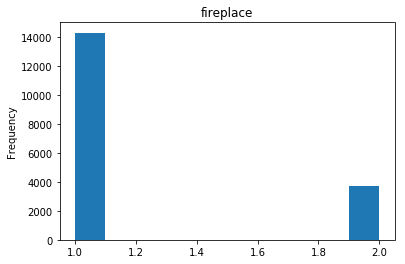


Train feature shape:  (12655, 43) (12655,)
Test feature shape:  (5424, 43) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7127487720770569


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7254609173175572
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7254792404660481
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.725440166855033
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6529110911704794
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             

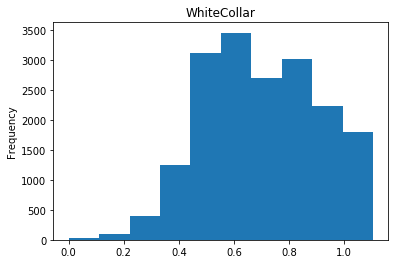


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


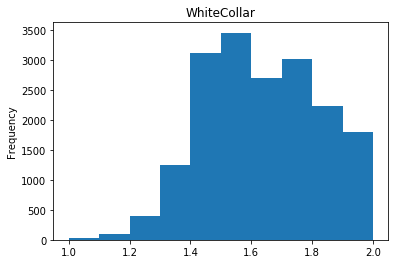


Train feature shape:  (16271, 43) (16271,)
Test feature shape:  (1808, 43) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7043658410780428


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7158573463300915
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.715866334452774
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7159611633405341
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6428946641320124
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             

In [3]:
def experiment1():
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            boxCoxTranformation(preProcessTheData(removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv'))))),
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment1()

##### It is for sure GradientBoostingRegressor vs XGBRegressor avail a high validation score.

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_Me

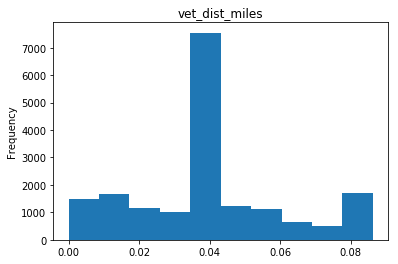


Shape of the data set before min max scaling :  (18079, 43)

Shape of the data set post min max scaling :  (18079, 43)


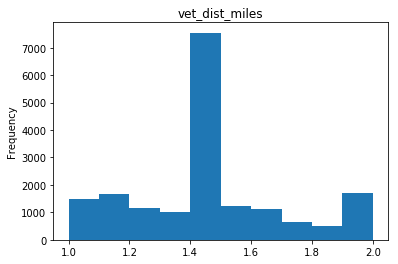


Train feature shape:  (14463, 42) (14463,)
Test feature shape:  (3616, 42) (3616,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7111496597996565


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.736453465478867
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7364314401874192
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7366447279609085
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6441464397714494
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             

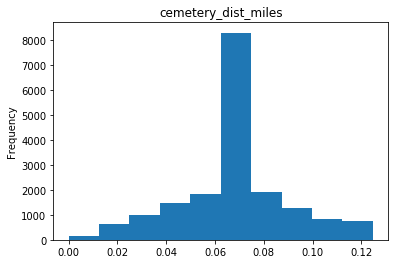


Shape of the data set before min max scaling :  (18079, 43)

Shape of the data set post min max scaling :  (18079, 43)


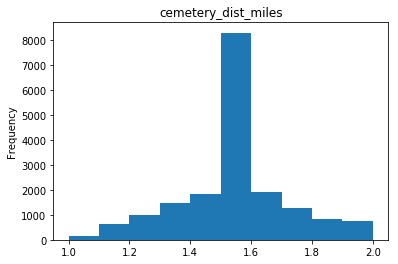


Train feature shape:  (16271, 42) (16271,)
Test feature shape:  (1808, 42) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7151390190855543


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7231316748479867
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7231369369719495
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7233007273323977
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6490303382219512
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

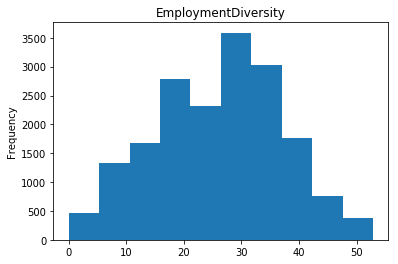


Shape of the data set before min max scaling :  (18079, 43)

Shape of the data set post min max scaling :  (18079, 43)


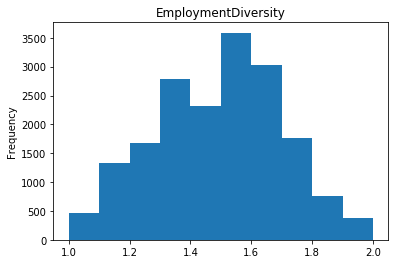


Train feature shape:  (16271, 42) (16271,)
Test feature shape:  (1808, 42) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7182826053852129


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7212784007385868


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7213291687616354
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7212306873123047
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6566862412326094
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.

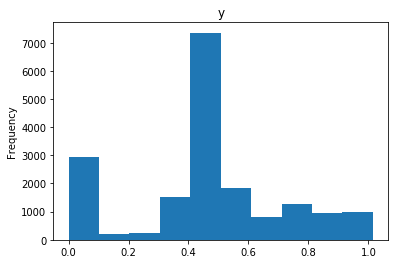


Shape of the data set before min max scaling :  (18079, 43)

Shape of the data set post min max scaling :  (18079, 43)


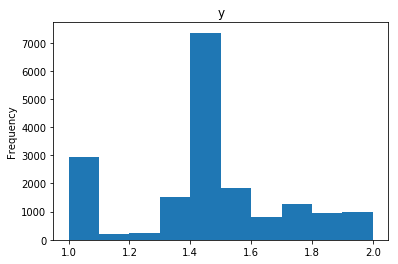


Train feature shape:  (14463, 42) (14463,)
Test feature shape:  (3616, 42) (3616,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7200860235308797


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7315461835627368
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.731549028393658
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7314609138309828
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6513801424443698
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             

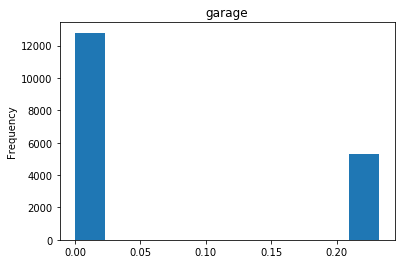


Shape of the data set before min max scaling :  (18079, 43)

Shape of the data set post min max scaling :  (18079, 43)


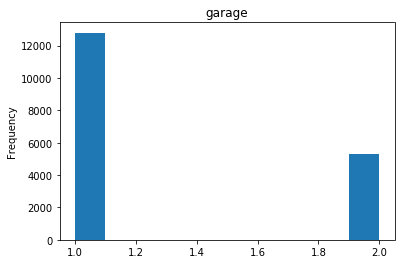


Train feature shape:  (12655, 42) (12655,)
Test feature shape:  (5424, 42) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7135443284885851


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7305306013340649


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7305101775814444
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7306022435852517
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6675250440603403
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.

In [4]:
def experiment2():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop('CollegeGrads',axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment2()
#experiment2()

###### It is evident that co related feature removal did help to increase the score for all the regressor.

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_Me

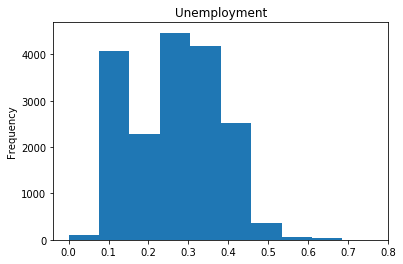


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


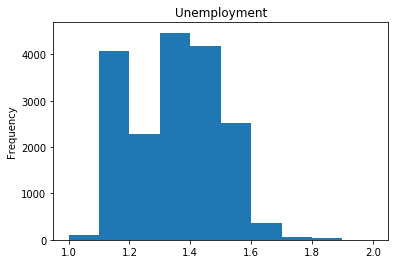


Train feature shape:  (12655, 41) (12655,)
Test feature shape:  (5424, 41) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7082987263343172


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7272948944203186
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7273036709720317
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7273903098725751
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6525985928841189
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

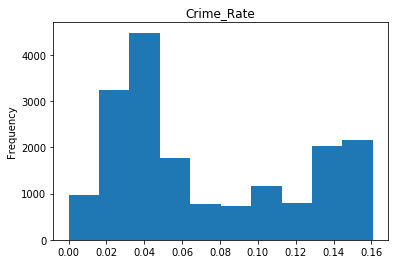


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


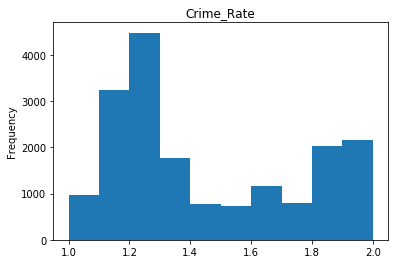


Train feature shape:  (12655, 41) (12655,)
Test feature shape:  (5424, 41) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7012512819274088


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7239882679939235
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7239828804057558
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.724185519099558
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6588495673971752
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             

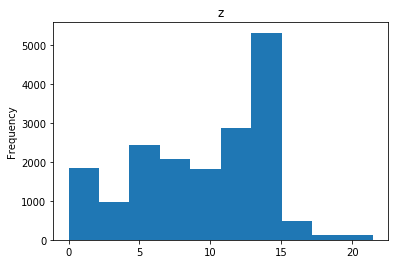


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


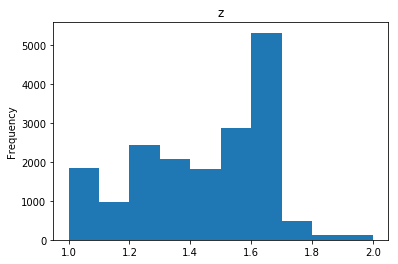


Train feature shape:  (16271, 41) (16271,)
Test feature shape:  (1808, 41) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7108807485290829


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7263650070712363
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7263542131048053
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7265146532707354
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6547826547059772
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

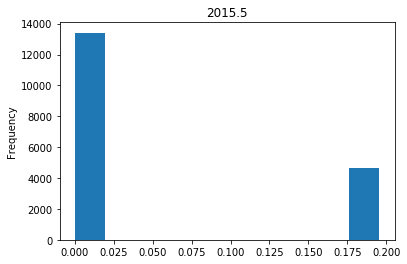


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


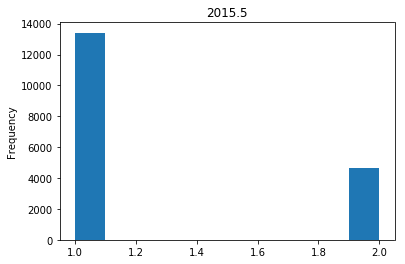


Train feature shape:  (12655, 41) (12655,)
Test feature shape:  (5424, 41) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7084596600910632


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7241887736489929
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7241752180287576
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7241410278593344
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6439617649219814
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

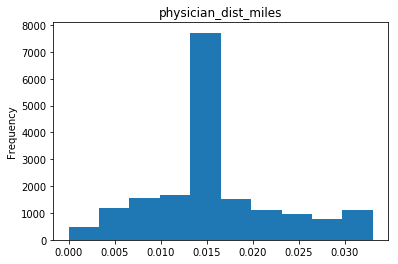


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


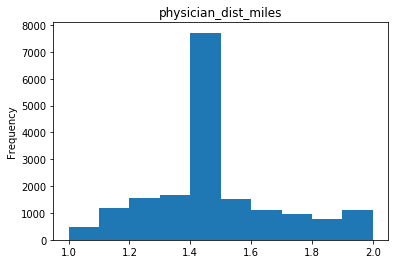


Train feature shape:  (16271, 41) (16271,)
Test feature shape:  (1808, 41) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.6945689680254329


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7073941051489223


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7074031970492057
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.707218982451153
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.649890096757991
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0,

In [5]:
def experiment3():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment3()

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_Me

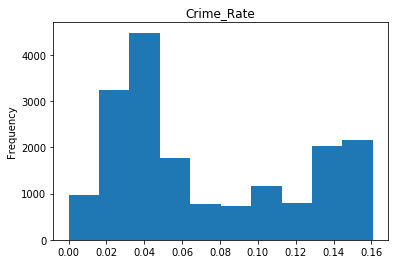


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


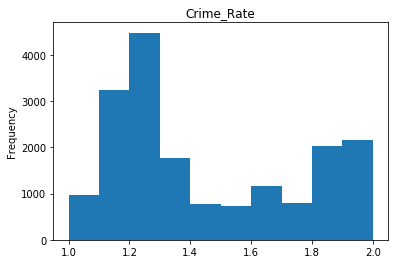


Train feature shape:  (16271, 41) (16271,)
Test feature shape:  (1808, 41) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.6954088246357908


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7226739453877093
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7226678551050462
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7228379879724705
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6486785893125899
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

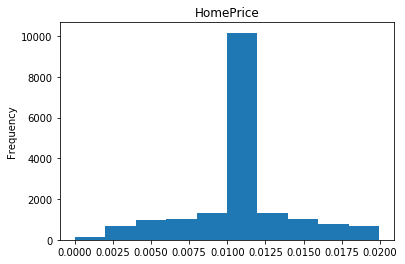


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


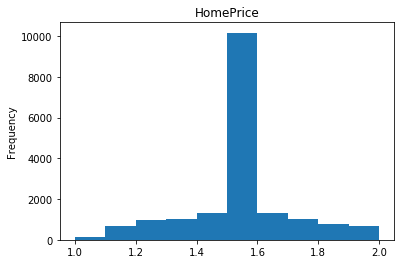


Train feature shape:  (14463, 41) (14463,)
Test feature shape:  (3616, 41) (3616,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7104293997066506


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7218509273403597
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7218623734360745
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7218180518988371
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6546841698223884
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

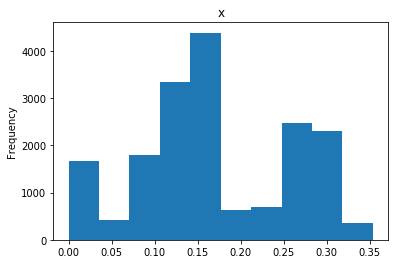


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


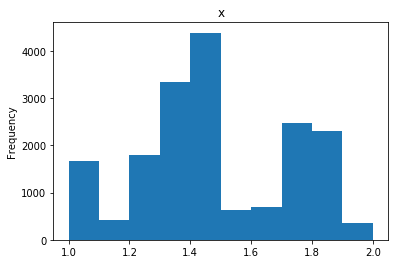


Train feature shape:  (12655, 41) (12655,)
Test feature shape:  (5424, 41) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.6724869030466951


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7189985478618544
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7190152989498995
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7188972601689746
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6411629528851964
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

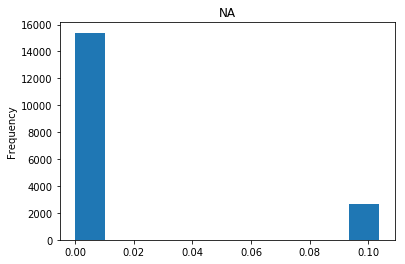


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


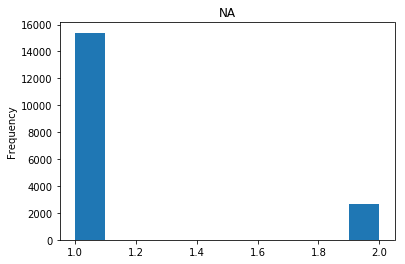


Train feature shape:  (12655, 41) (12655,)
Test feature shape:  (5424, 41) (5424,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.6930958670034416


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7179958952243011


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7179881819222216
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7180201611947427
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6359386748754344
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.

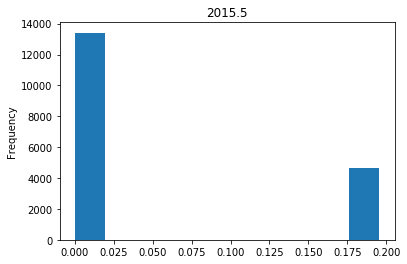


Shape of the data set before min max scaling :  (18079, 42)

Shape of the data set post min max scaling :  (18079, 42)


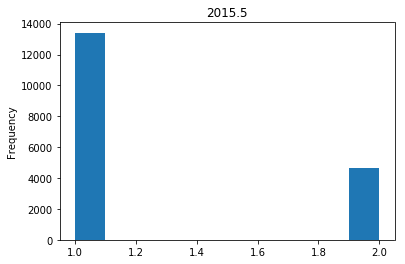


Train feature shape:  (14463, 41) (14463,)
Test feature shape:  (3616, 41) (3616,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7123609860094142


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.721904820630558
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7219116999057873
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7221140699712122
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6335725568911397
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             

In [6]:
#with scaling between 1,2
def experiment4():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment4()

##### Scaling between 0-1 and 1-2 has no impact 

What next?
1. rent_per_bed
2. confirm if 2 features removal has increased the score?
3. transforming boolean data types
4. transforming boolean data types and shrinking feature to PCA(10)
5. PCA(10) right away
6. with no rent transformation with practical use of modelling in mind - rent
7. with no rent transformation with practical use of modelling in mind - rent per bed
8. can we have have related featues(3 categories) forming 3 features and then perform rent predictions.
9. removing time feature: lotsize, time
10. neural network {there would so many combination here}

Let us re-order the above list:
* confirm if 2 features removal has increased the score?
* removing time feature: lotsize, time
* with no rent transformation with practical use of modelling in mind - rent
* rent_per_bed
* with no rent transformation with practical use of modelling in mind - rent per bed
* PCA(10) right away
* transforming boolean data types
* transforming boolean data types and shrinking feature to PCA(10)
* can we have have related featues(3 categories) forming 3 features and then perform rent predictions.
* neural network {there would so many combination here}

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_Me

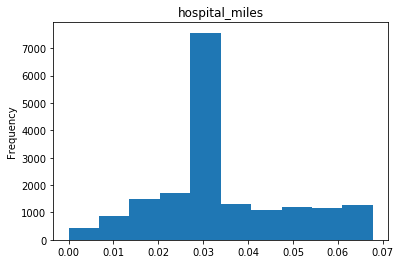


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


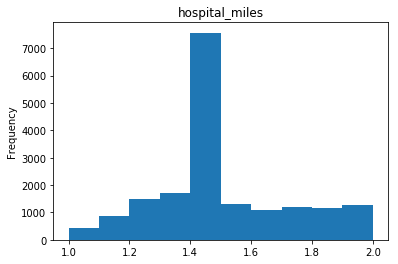


Train feature shape:  (18079, 43) (18079,)
Test feature shape:  (0, 43) (0,)
 Median Score :  0.7764467784823026 Average Score :  0.7748536549825217


array([0.77772224, 0.77806787, 0.77685399, 0.770648  , 0.77114109,
       0.78229687, 0.77739719, 0.77348327, 0.76655936, 0.77277354,
       0.77644678])

In [7]:
def checkIfFeatureRemoved():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    #df['rent_per_']
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(cross_cv)
checkIfFeatureRemoved()

##### With CollegeGrads and Census_Vacancy removed:
array([0.78162104, 0.77902842, 0.77416637, 0.77451817, 0.77583158,
       0.77235315, 0.77999664, 0.78130302, 0.78070535, 0.77399241,
       0.77742186])


In [8]:
list_temp = [0.78162104, 0.77902842, 0.77416637, 0.77451817, 0.77583158, 0.77235315, 0.77999664, 0.78130302, 0.78070535, 0.77399241, 0.77742186]

print(np.average(list_temp))

0.7773580009090909


##### Without removing the features:
array([0.77113593, 0.7723527 , 0.77144092, 0.77619224, 0.77209543,
       0.77119765, 0.76799843, 0.77142307, 0.77876057, 0.77299295,
       0.77214368])

In [9]:
list_temp = [0.77113593, 0.7723527 , 0.77144092, 0.77619224, 0.77209543, 0.77119765, 0.76799843, 0.77142307, 0.77876057, 0.77299295, 0.77214368]
print(np.average(list_temp))

0.7725212336363636


##### It cannot be proved that we have increase in the score with this approach.

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_Me

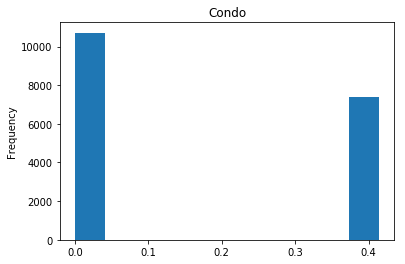


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


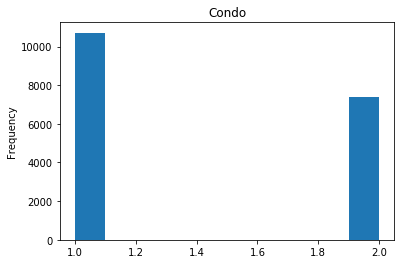


Train feature shape:  (18079, 43) (18079,)
Test feature shape:  (0, 43) (0,)
 Median Score :  -0.04030929804442085 Average Score :  -0.039372655793023466


array([-0.04214875, -0.0353174 , -0.02917195, -0.02943231, -0.05206569,
       -0.03576913, -0.04483637, -0.0403093 , -0.04484885, -0.04080522,
       -0.03839425])

In [10]:
def checkIfRentNotNormalized():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    #df['rent_per_']
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(cross_cv)
checkIfRentNotNormalized()

##### It is a disaster :(. I do not understand the reason though. It may be because too little values predicting too high values. so how do we actually predict the actual rent ?

dentist_dist_miles    0.741940
opt_dist_miles        0.721298
Name: physician_dist_miles, dtype: float64 


physician_dist_miles    0.741940
opt_dist_miles          0.801435
Name: dentist_dist_miles, dtype: float64 


physician_dist_miles    0.721298
dentist_dist_miles      0.801435
Name: opt_dist_miles, dtype: float64 


WhiteCollar    0.916561
Name: CollegeGrads, dtype: float64 


CollegeGrads    0.916561
Name: WhiteCollar, dtype: float64 


Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the da

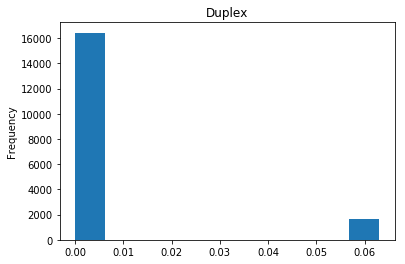


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


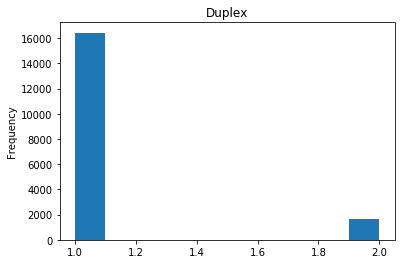


Train feature shape:  (18079, 43) (18079,)
Test feature shape:  (0, 43) (0,)
 Median Score :  0.8060397130486516 Average Score :  0.8066880938499559


array([0.8078293 , 0.80818715, 0.80603971, 0.80686531, 0.80553107,
       0.80474769, 0.80577876, 0.80573419, 0.80489549, 0.80872279,
       0.80923757])

In [11]:
def checkIfRentPerBed():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(preProcessTheData((df)))
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(cross_cv)
checkIfRentPerBed()

##### It is a very good sign. Data visualization has really helped us :)

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_MedianInco

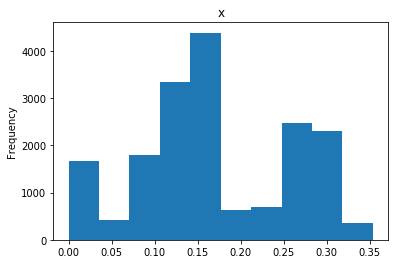


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


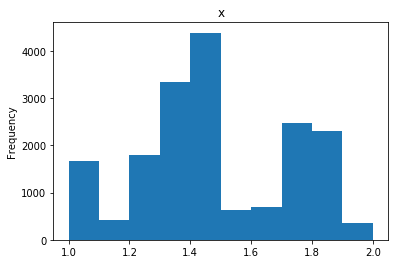


Train feature shape:  (18079, 43) (18079,)
Test feature shape:  (0, 43) (0,)
 Median Score :  0.8049718681803969 Average Score :  0.8050818293201079


In [12]:
def checkIfNoTimeEstimate():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(preProcessTheData((df)))
    #df=df.drop([2015.25, 2015.5, 2015.75, 2016.25],axis=1)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = checkIfNoTimeEstimate()
#dummy.fit(dummy_X, dummy_y)

In [22]:
def printSortedFeatures(clf,X,y):
    clf.fit(X,y)
    feature_importances = clf.feature_importances_
    features = list(X)

    a =[]
    for i in range(0,len(features)):
        a.append((features[i], feature_importances[i]))
    print(sorted(a, key=lambda x: x[1], reverse=True))
    
printSortedFeatures(dummy, dummy_X,dummy_y)

[('bed', 0.15273775), ('y', 0.10951009), ('sqft', 0.10951009), ('WhiteCollar', 0.0648415), ('x', 0.05907781), ('z', 0.05907781), ('HomePrice', 0.054755043), ('bath', 0.041786745), ('Census_Vacancy', 0.04034582), ('CollegeGrads', 0.03314121), ('yearbuilt', 0.027377522), ('Crime_Rate', 0.0259366), ('Census_MedianIncome', 0.023054754), ('starbucks_miles', 0.021613833), ('vet_dist_miles', 0.021613833), ('Schools', 0.015850144), ('lotsize', 0.015850144), ('garage_no', 0.0129683), ('cemetery_dist_miles', 0.0129683), ('walmart_miles', 0.0129683), ('railline_miles', 0.0129683), ('opt_dist_miles', 0.011527377), ('fireplace_no', 0.008645534), ('Unemployment', 0.008645534), ('dentist_dist_miles', 0.008645534), ('hospital_miles', 0.007204611), ('farmers_miles', 0.0057636886), ('EmploymentDiversity', 0.0057636886), (2015.75, 0.004322767), ('physician_dist_miles', 0.004322767), ('nationalhighway_miles', 0.0028818443), (2015.25, 0.0028818443), ('patio_yes', 0.0014409221), ('pool_no', 0.0), ('garage_y

##### Above relation between feature and feature importance score clearly indicates the impact of the feature removal impact. For example, removing lotsize will have no impact on the outcome because the weight for the feature is anyways 0. we may also see the ratio difference between the feature and the top weighted feature (rent per bed) to understand the probable impact due to removal of one.

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_MedianInco

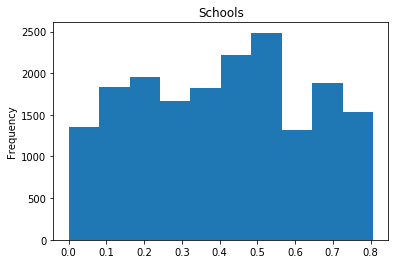


Shape of the data set before min max scaling :  (18079, 39)

Shape of the data set post min max scaling :  (18079, 39)


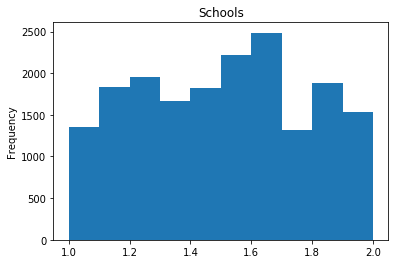


Train feature shape:  (18079, 38) (18079,)
Test feature shape:  (0, 38) (0,)
 Median Score :  0.8024213034484036 Average Score :  0.8022354704329822
[('bed', 0.1874106), ('sqft', 0.09012876), ('bath', 0.08869814), ('y', 0.07725322), ('z', 0.07725322), ('HomePrice', 0.07153076), ('x', 0.06437768), ('WhiteCollar', 0.05007153), ('Unemployment', 0.025751073), ('Census_Vacancy', 0.024320457), ('CollegeGrads', 0.024320457), ('starbucks_miles', 0.020028612), ('Census_MedianIncome', 0.018597998), ('vet_dist_miles', 0.018597998), ('dentist_dist_miles', 0.017167382), ('fireplace', 0.017167382), ('yearbuilt', 0.014306151), ('NA', 0.012875536), ('Schools', 0.010014306), ('Crime_Rate', 0.008583691), ('garage', 0.008583691), ('railline_miles', 0.008583691), ('hospital_miles', 0.0071530757), ('Quadplex', 0.0071530757), ('Triplex', 0.0071530757), ('EmploymentDiversity', 0.005722461), ('farmers_miles', 0.005722461), ('SFR', 0.0042918455), (2015.75, 0.0042918455), ('walmart_miles', 0.0028612304), ('Con

In [14]:
def checkIfNoTime():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = checkIfNoTime()
printSortedFeatures(dummy, dummy_X,dummy_y)

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dataset before transformation :  (18079, 48)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_mil

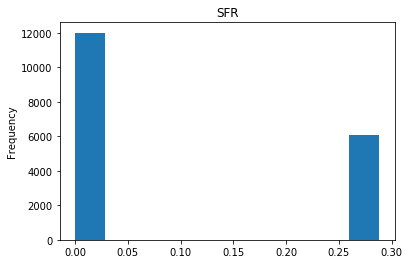


Shape of the data set before min max scaling :  (18079, 48)

Shape of the data set post min max scaling :  (18079, 48)


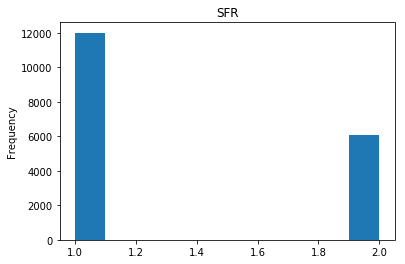


Train feature shape:  (18079, 47) (18079,)
Test feature shape:  (0, 47) (0,)
 Median Score :  0.8069609928363759 Average Score :  0.806798899236438
[('bed', 0.1874106), ('sqft', 0.09012876), ('bath', 0.08869814), ('y', 0.07725322), ('z', 0.07725322), ('HomePrice', 0.07153076), ('x', 0.06437768), ('WhiteCollar', 0.05007153), ('Unemployment', 0.025751073), ('Census_Vacancy', 0.024320457), ('CollegeGrads', 0.024320457), ('starbucks_miles', 0.020028612), ('Census_MedianIncome', 0.018597998), ('vet_dist_miles', 0.018597998), ('dentist_dist_miles', 0.017167382), ('fireplace_yes', 0.017167382), ('yearbuilt', 0.014306151), ('NA', 0.012875536), ('Schools', 0.010014306), ('garage_no', 0.008583691), ('Crime_Rate', 0.008583691), ('hospital_miles', 0.0071530757), ('railline_miles', 0.0071530757), ('Quadplex', 0.0071530757), ('Triplex', 0.0071530757), ('EmploymentDiversity', 0.005722461), ('farmers_miles', 0.005722461), ('SFR', 0.0042918455), (2015.75, 0.0042918455), ('walmart_miles', 0.0028612304)

In [15]:
def checkBoolTransformation():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    #df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = checkBoolTransformation()
printSortedFeatures(dummy, dummy_X,dummy_y)

##### It is clear that dummies did not make difference. Both pool_yes and pool_no have zero weight. 
##### Before transformation : ('garage', 0.008583691) :: Post Transformation : ('garage_yes', 0.008583691),  ('garage_no', 0.0)

In [16]:
def getNPca(df, n):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n)
    ttt = df.drop('rent',axis=1)
    arr = pca.fit_transform(ttt)
    df_plot = pd.DataFrame(arr)
    df_plot['rent'] = df['rent']

    return df_plot


Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dataset before transformation :  (18079, 48)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_mil

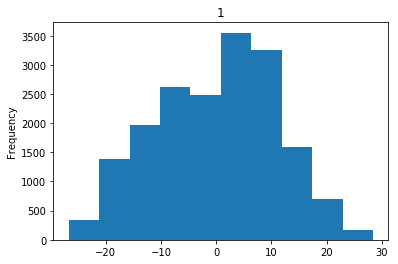


Shape of the data set before min max scaling :  (18079, 6)

Shape of the data set post min max scaling :  (18079, 6)


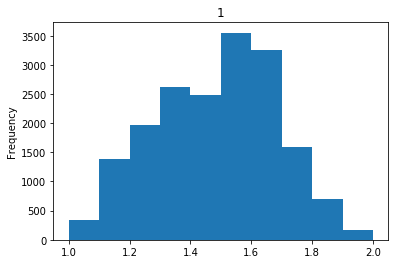


Train feature shape:  (18079, 5) (18079,)
Test feature shape:  (0, 5) (0,)
 Median Score :  0.20813577316770937 Average Score :  0.20856838000337474
[(4, 0.36546764), (1, 0.31654677), (3, 0.15251799), (2, 0.1438849), (0, 0.021582734)]
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dataset before transformation :  (18079, 48)
Ignoring the columns.... []
Performing column t

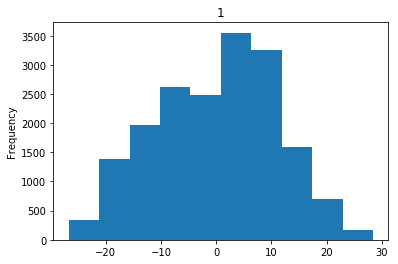


Shape of the data set before min max scaling :  (18079, 11)

Shape of the data set post min max scaling :  (18079, 11)


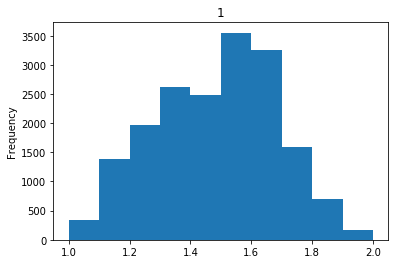


Train feature shape:  (18079, 10) (18079,)
Test feature shape:  (0, 10) (0,)
 Median Score :  0.44755090418469035 Average Score :  0.4477555040085583
[(7, 0.20773639), (4, 0.1747851), (8, 0.11747851), (6, 0.11461318), (1, 0.106017195), (9, 0.08022922), (5, 0.068767905), (3, 0.05730659), (2, 0.054441262), (0, 0.018624641)]
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dat

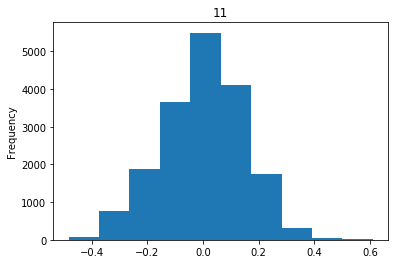


Shape of the data set before min max scaling :  (18079, 16)

Shape of the data set post min max scaling :  (18079, 16)


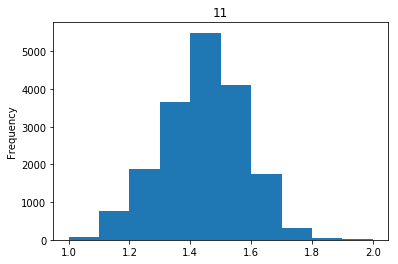


Train feature shape:  (18079, 15) (18079,)
Test feature shape:  (0, 15) (0,)
 Median Score :  0.4826001980905382 Average Score :  0.48334264366323665
[(7, 0.16235632), (4, 0.11637931), (6, 0.10488506), (12, 0.08189655), (14, 0.08189655), (11, 0.077586204), (13, 0.0704023), (8, 0.066091955), (10, 0.047413792), (3, 0.04454023), (2, 0.038793102), (9, 0.03735632), (1, 0.031609196), (5, 0.024425287), (0, 0.014367816)]
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummie

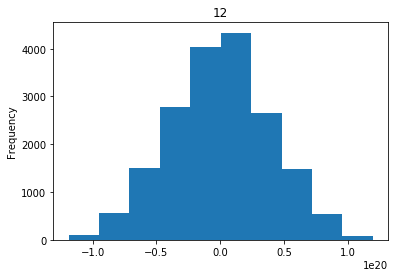


Shape of the data set before min max scaling :  (18079, 21)

Shape of the data set post min max scaling :  (18079, 21)


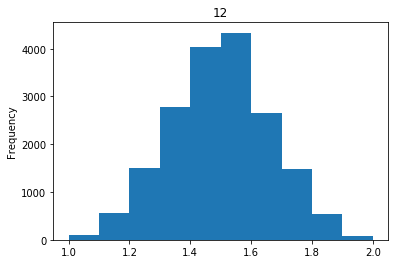


Train feature shape:  (18079, 20) (18079,)
Test feature shape:  (0, 20) (0,)
 Median Score :  0.4880036082251321 Average Score :  0.48905602530019204
[(10, 0.09899569), (8, 0.09469154), (6, 0.08895265), (11, 0.08895265), (19, 0.07747489), (15, 0.07460545), (3, 0.07317073), (7, 0.05738881), (9, 0.051649928), (5, 0.045911048), (13, 0.04160689), (17, 0.038737446), (1, 0.028694404), (16, 0.028694404), (18, 0.028694404), (14, 0.020086084), (2, 0.018651363), (4, 0.017216643), (12, 0.014347202), (0, 0.011477762)]
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of

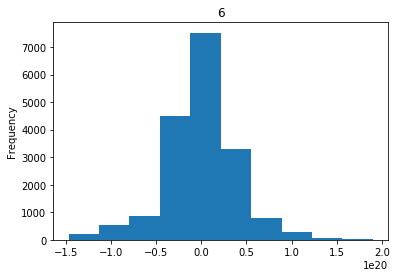


Shape of the data set before min max scaling :  (18079, 26)

Shape of the data set post min max scaling :  (18079, 26)


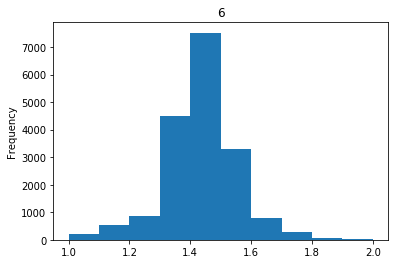


Train feature shape:  (18079, 25) (18079,)
Test feature shape:  (0, 25) (0,)
 Median Score :  0.5487180759650603 Average Score :  0.5485775251061978
[(21, 0.09714286), (10, 0.09), (11, 0.07857143), (20, 0.074285716), (8, 0.07285714), (6, 0.068571426), (3, 0.06428572), (16, 0.052857142), (9, 0.04857143), (4, 0.042857144), (14, 0.04142857), (19, 0.03857143), (15, 0.035714287), (23, 0.034285713), (7, 0.032857142), (13, 0.021428572), (12, 0.02), (17, 0.018571429), (5, 0.015714286), (1, 0.011428571), (22, 0.011428571), (0, 0.008571428), (2, 0.008571428), (18, 0.0057142857), (24, 0.0057142857)]
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier remov

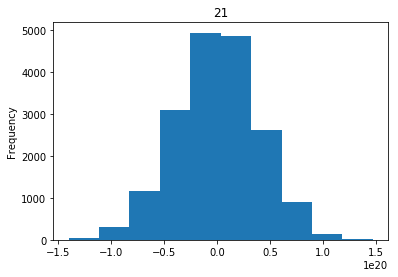


Shape of the data set before min max scaling :  (18079, 31)

Shape of the data set post min max scaling :  (18079, 31)


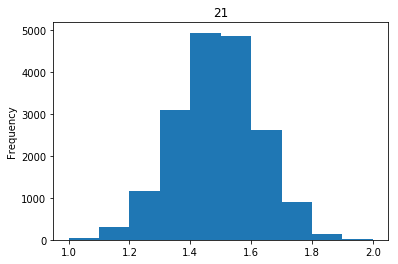


Train feature shape:  (18079, 30) (18079,)
Test feature shape:  (0, 30) (0,)
 Median Score :  0.5867652997896606 Average Score :  0.5873491418004926
[(8, 0.068571426), (26, 0.068571426), (10, 0.06714286), (21, 0.065714285), (6, 0.06285714), (11, 0.061428573), (27, 0.058571428), (5, 0.052857142), (9, 0.052857142), (29, 0.04142857), (3, 0.037142858), (7, 0.035714287), (13, 0.035714287), (16, 0.035714287), (24, 0.035714287), (20, 0.034285713), (19, 0.03142857), (22, 0.024285715), (15, 0.022857143), (14, 0.018571429), (28, 0.018571429), (1, 0.012857143), (17, 0.011428571), (12, 0.01), (23, 0.008571428), (0, 0.007142857), (25, 0.007142857), (2, 0.004285714), (4, 0.004285714), (18, 0.004285714)]


In [17]:
def checknPCA(n):
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    #df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    df = getNPca(df,n)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

for i in range(5,35,5):
    dummy, dummy_X,dummy_y = checknPCA(i)
    printSortedFeatures(dummy, dummy_X,dummy_y)

##### Clearly, more meaning features high is the score. PCA projects the weak features on the high influencing features and hence there is a possibility the gravity of the feature might get lost because of low projection score.

##### XGBoost comes to rescue here by identifying the right weights for each features/variables. Therefore, PCA is no longer required.

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dataset before transformation :  (18079, 48)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_mil

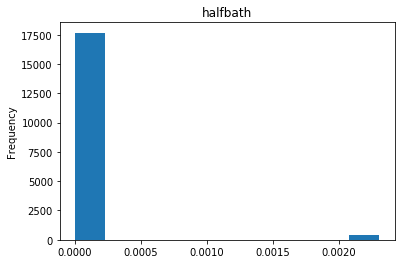


Shape of the data set before min max scaling :  (18079, 48)

Shape of the data set post min max scaling :  (18079, 48)


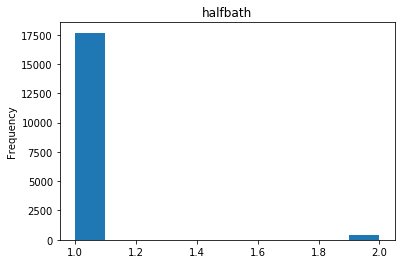


Train feature shape:  (18079, 47) (18079,)
Test feature shape:  (0, 47) (0,)
 Median Score :  0.40335127088642364 Average Score :  0.40971671847079644


In [21]:
def checkMLPRegressor():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    #df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    #df = getNPca(df,n)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    from sklearn.neural_network import MLPRegressor
    clf = MLPRegressor()
    cv = ShuffleSplit(n_splits=5, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = checkMLPRegressor()
#printSortedFeatures(dummy, dummy_X,dummy_y)    

##### Need to dig deep into various network but let us first fine tune XGBoost. The one who consistently gave us high score.
https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

The above blog indicates XGBoost is better than random NN.

#### We will try the stacking approach as mentioned in:

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dataset before transformation :  (18079, 48)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_mil

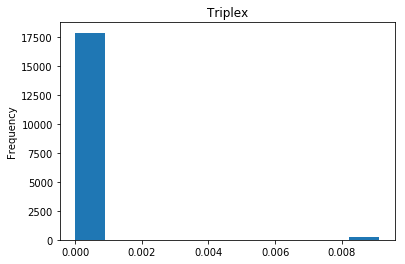


Shape of the data set before min max scaling :  (18079, 48)

Shape of the data set post min max scaling :  (18079, 48)


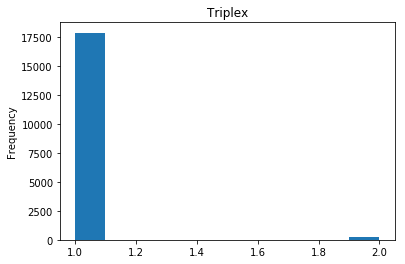


Train feature shape:  (18079, 47) (18079,)
Test feature shape:  (0, 47) (0,)
[0 0 3 ... 0 0 0]
[0.45889571 0.44821364 0.44965716 0.45268856 0.44929628]  Median Score :  0.4496571634788885 Average Score :  0.4517502706604114


In [19]:
def predictNA():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df2 = df.copy()
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    #df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    #df = getNPca(df,n)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    le = preprocessing.LabelEncoder()
    df2 = df2.fillna('NA')
    df2 = df2[df2.property_type != 'NA']
    y_train_new = le.fit_transform(df2.property_type.tolist())
    X_test_NA = X_train[X_train.NA == 2]
    X_train = X_train[X_train.NA != 2]
    X_train.drop(['Condo','Triplex', 'SFR','NA','Quadplex'], axis=1)
    '''y_train_new = pd.DataFrame()
    y_train_new[2015.25] = X_train[2015.25]
    y_train_new[2015.5] = X_train[2015.5]
    y_train_new[2015.75] = X_train[2015.75]
    y_train_new[2016.25] = X_train[2016.25]'''
    
    print(y_train_new)
    #return
    clf = XGBClassifier()
    cv = ShuffleSplit(n_splits=5, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train_new,cv=cv, scoring='accuracy',n_jobs=3)
    print(cross_cv," Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = predictNA()
#printSortedFeatures(dummy, dummy_X,dummy_y)    

##### Failed again in predicting the property type with high accuracy.

Counter({'Condo': 7418, 'SFR': 6106, nan: 2688, 'Duplex': 1672, 'Triplex': 238, 'Quadplex': 81})
Initial df size (6106, 40)
Duplicates size (6, 40)
NaN columns : ['county', 'zipcode']
NaN columns (post fillna): []
Duplicates size (post fillna) (6, 40)
Duplicates without considering *time* feature :  (38, 40)
Post duplicates removal data set size :  (6068, 40)

Shape of the data set before to outlier removal :  (6068, 40)
Shape of the data set after outlier removal :  (6068, 40)

Shape of the data set before transforming :  (6068, 40)
Shape of the data set after transforming :  (6068, 39) 


Shape of the data set before creating dummies :  (6068, 39)
Shape of the data set post creating dummies :  (6068, 43)

Shape of the dataset before transformation :  (6068, 43)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Shape of the dataset after transformation :  (6068, 43)
dentist_dist_miles    0.708184
Name: physician_dist_miles, dtype: float64 


physician_dist_miles    0.708184
Name: dentist_dist_miles, dtype: float64 


CollegeGrads      0.766955
WhiteCollar       0.729910
Schools           0.747569
Census_Vacancy   -0.747590
Name: Census_MedianIncome, dtype: float64 


Census_MedianIncome    0.766955
WhiteCollar            0.942855
Name: CollegeGrads, dtype: float64 


Census_MedianIncome    0.729910
CollegeGrads           0.942855
Name: WhiteCollar, dtype: float64 


Census_MedianIncome    0.747569
Name: Schools, dtype: float64 


Census_MedianIncome   -0.74759
Name: Census_Vacancy, dtype: float64 


garage_yes   -1.0
Name: garage_no, dtype: float64 


garage_no   -1.0
Name: garage_yes, dtype: float64 


pool_yes   -1.0
Name: pool_no, dtype: float64 


pool_no   -1.0
Name: pool_yes, dtype: float64 


patio_yes   -1.0
Name: patio_no, dtype: float64 


patio_no   -1.0
Name: patio_yes, dtype: flo

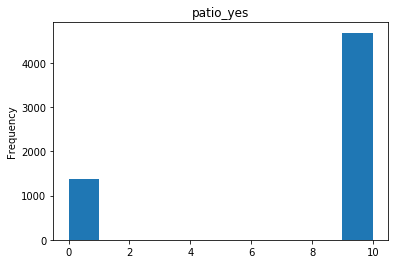


Shape of the data set before min max scaling :  (6068, 43)

Shape of the data set post min max scaling :  (6068, 43)


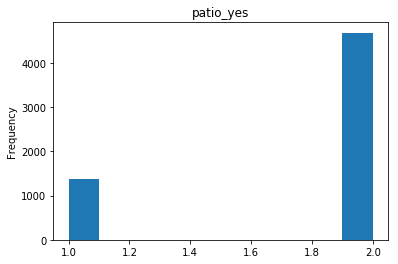


Train feature shape:  (6068, 42) (6068,)
Test feature shape:  (0, 42) (0,)
[0.78093084 0.7845565  0.78304013 0.78265152 0.78658801 0.77802484
 0.78144354 0.7891218  0.78472976 0.7776394  0.7844144 ]  Median Score :  0.7830401299706455 Average Score :  0.7830127948240342
[('bed', 0.22627737), ('HomePrice', 0.10364964), ('bath', 0.07591241), ('sqft', 0.06861314), ('y', 0.05839416), ('z', 0.05839416), ('x', 0.045255475), ('WhiteCollar', 0.03941606), ('Census_MedianIncome', 0.026277373), ('yearbuilt', 0.023357663), ('garage_no', 0.02189781), ('dentist_dist_miles', 0.020437956), ('Crime_Rate', 0.018978102), ('CollegeGrads', 0.018978102), ('Schools', 0.017518248), ('starbucks_miles', 0.017518248), ('Census_Vacancy', 0.016058395), ('vet_dist_miles', 0.016058395), (2016.25, 0.01459854), ('opt_dist_miles', 0.013138686), ('Unemployment', 0.013138686), ('fireplace_no', 0.011678832), ('railline_miles', 0.011678832), ('hospital_miles', 0.010218978), ('patio_yes', 0.008759124), ('EmploymentDiversit

In [42]:
def sepClfForProp(property_type_str='all', n_splits=11):
    df = readTheData('TrainData_PA.csv')
    print(Counter(df.property_type))
    
    if property_type_str != 'all':
        df = df[df.property_type == property_type_str]
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)

    df = removeOutlier(removeDuplicate(df))
    
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))

    printCorr(df)
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=n_splits, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(cross_cv," Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = sepClfForProp('SFR')
printSortedFeatures(dummy, dummy_X,dummy_y)    

##### Clearly there is a percentage increase in the prediction score.

Counter({'Condo': 7418, 'SFR': 6106, nan: 2688, 'Duplex': 1672, 'Triplex': 238, 'Quadplex': 81})
Initial df size (7418, 40)
Duplicates size (32, 40)
NaN columns : ['county', 'zipcode', 'address']
NaN columns (post fillna): []
Duplicates size (post fillna) (32, 40)
Duplicates without considering *time* feature :  (53, 40)
Post duplicates removal data set size :  (7365, 40)

Shape of the data set before to outlier removal :  (7365, 40)
Shape of the data set after outlier removal :  (7365, 40)

Shape of the data set before transforming :  (7365, 40)
Shape of the data set after transforming :  (7365, 39) 


Shape of the data set before creating dummies :  (7365, 39)
Shape of the data set post creating dummies :  (7365, 43)

Shape of the dataset before transformation :  (7365, 43)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Shape of the dataset after transformation :  (7365, 43)
CollegeGrads      0.705853
Census_Vacancy   -0.701151
Name: Census_MedianIncome, dtype: float64 


Census_MedianIncome    0.705853
WhiteCollar            0.953135
Name: CollegeGrads, dtype: float64 


CollegeGrads    0.953135
Name: WhiteCollar, dtype: float64 


Census_Vacancy   -0.71816
Name: Schools, dtype: float64 


Census_MedianIncome   -0.701151
Schools               -0.718160
Name: Census_Vacancy, dtype: float64 


pool_yes   -1.0
Name: pool_no, dtype: float64 


pool_no   -1.0
Name: pool_yes, dtype: float64 


fireplace_yes   -1.0
Name: fireplace_no, dtype: float64 


fireplace_no   -1.0
Name: fireplace_yes, dtype: float64 


patio_yes   -1.0
Name: patio_no, dtype: float64 


patio_no   -1.0
Name: patio_yes, dtype: float64 


Input data set shape :  (7365, 43)

feature_columns :  ['garage_no', 'fireplace_no', 'yearbuilt', 'y', 'patio_yes', 'farmers_miles', 'pool_no', 'EmploymentDiversity', 'Census_Vacancy', 'x', 'Schools',

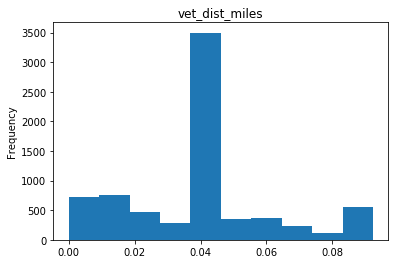


Shape of the data set before min max scaling :  (7365, 43)

Shape of the data set post min max scaling :  (7365, 43)


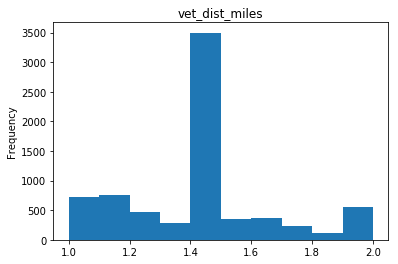


Train feature shape:  (7365, 42) (7365,)
Test feature shape:  (0, 42) (0,)
[0.83194853 0.82872747]  Median Score :  0.8303380020143605 Average Score :  0.8303380020143605
Counter({'Condo': 7418, 'SFR': 6106, nan: 2688, 'Duplex': 1672, 'Triplex': 238, 'Quadplex': 81})
Initial df size (6106, 40)
Duplicates size (6, 40)
NaN columns : ['county', 'zipcode']
NaN columns (post fillna): []
Duplicates size (post fillna) (6, 40)
Duplicates without considering *time* feature :  (38, 40)
Post duplicates removal data set size :  (6068, 40)

Shape of the data set before to outlier removal :  (6068, 40)
Shape of the data set after outlier removal :  (6068, 40)

Shape of the data set before transforming :  (6068, 40)
Shape of the data set after transforming :  (6068, 39) 


Shape of the data set before creating dummies :  (6068, 39)
Shape of the data set post creating dummies :  (6068, 43)

Shape of the dataset before transformation :  (6068, 43)
Ignoring the columns.... []
Performing column transfor

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Shape of the dataset after transformation :  (6068, 43)
dentist_dist_miles    0.708184
Name: physician_dist_miles, dtype: float64 


physician_dist_miles    0.708184
Name: dentist_dist_miles, dtype: float64 


CollegeGrads      0.766955
WhiteCollar       0.729910
Schools           0.747569
Census_Vacancy   -0.747590
Name: Census_MedianIncome, dtype: float64 


Census_MedianIncome    0.766955
WhiteCollar            0.942855
Name: CollegeGrads, dtype: float64 


Census_MedianIncome    0.729910
CollegeGrads           0.942855
Name: WhiteCollar, dtype: float64 


Census_MedianIncome    0.747569
Name: Schools, dtype: float64 


Census_MedianIncome   -0.74759
Name: Census_Vacancy, dtype: float64 


garage_yes   -1.0
Name: garage_no, dtype: float64 


garage_no   -1.0
Name: garage_yes, dtype: float64 


pool_yes   -1.0
Name: pool_no, dtype: float64 


pool_no   -1.0
Name: pool_yes, dtype: float64 


patio_yes   -1.0
Name: patio_no, dtype: float64 


patio_no   -1.0
Name: patio_yes, dtype: flo

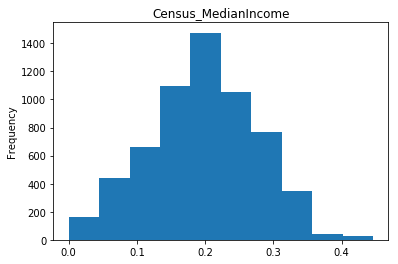


Shape of the data set before min max scaling :  (6068, 43)

Shape of the data set post min max scaling :  (6068, 43)


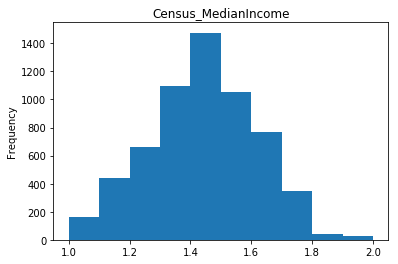


Train feature shape:  (6068, 42) (6068,)
Test feature shape:  (0, 42) (0,)
[0.75231447 0.74478488]  Median Score :  0.7485496755975667 Average Score :  0.7485496755975667
Counter({'Condo': 7418, 'SFR': 6106, nan: 2688, 'Duplex': 1672, 'Triplex': 238, 'Quadplex': 81})
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dataset before transformation :  (18079, 48)
Ignoring the c

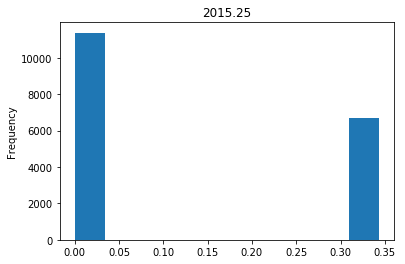


Shape of the data set before min max scaling :  (18079, 48)

Shape of the data set post min max scaling :  (18079, 48)


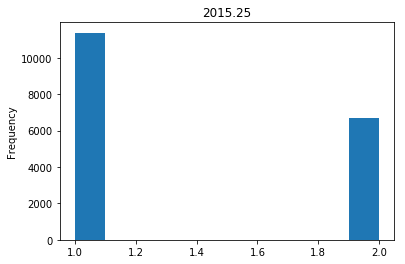


Train feature shape:  (18079, 47) (18079,)
Test feature shape:  (0, 47) (0,)
[0.80180255 0.80710088 0.80626066 0.8058134  0.80934063 0.80350056
 0.81054457 0.80781612 0.8068421  0.80275552 0.80771336]  Median Score :  0.8068421009711909 Average Score :  0.8063173036385728
Shape of the data set before transforming :  (12132, 40)
Shape of the data set after transforming :  (12132, 44) 


Shape of the data set before creating dummies :  (12132, 44)
Shape of the data set post creating dummies :  (12132, 48)

Shape of the dataset before transformation :  (12132, 48)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'yearbuilt', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'Em

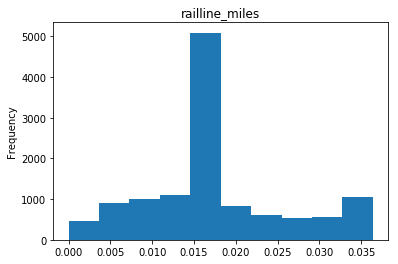


Shape of the data set before min max scaling :  (12132, 43)

Shape of the data set post min max scaling :  (12132, 43)


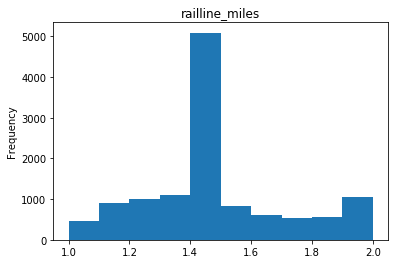


Train feature shape:  (12132, 42) (12132,)
Test feature shape:  (0, 42) (0,)
10.78 % of properties within predicted rent within 1% of actual rent
21.43 % of properties within predicted rent within 2% of actual rent
32.44 % of properties within predicted rent within 3% of actual rent
42.74 % of properties within predicted rent within 4% of actual rent
52.59 % of properties within predicted rent within 5% of actual rent
Ys Condo:  24264 24264
Input data set shape :  (12132, 43)

feature_columns :  ['SFR', 'garage_no', 'fireplace_no', 'yearbuilt', 'y', 'patio_yes', 'farmers_miles', 'pool_no', 'EmploymentDiversity', 'Census_Vacancy', 'x', 'Schools', 'sqft', 'lotsize', 'cemetery_dist_miles', 'starbucks_miles', 'z', 'hospital_miles', 'opt_dist_miles', 'garage_yes', 'WhiteCollar', 'nationalhighway_miles', 'bath', 'Crime_Rate', 'vet_dist_miles', 'fireplace_yes', 'walmart_miles', 'Unemployment', 'dentist_dist_miles', 'patio_no', 'halfbath', 'pool_yes', 'bed', 2015.25, 2015.5, 2015.75, 2016.25,

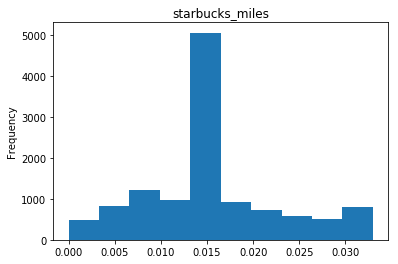


Shape of the data set before min max scaling :  (12132, 43)

Shape of the data set post min max scaling :  (12132, 43)


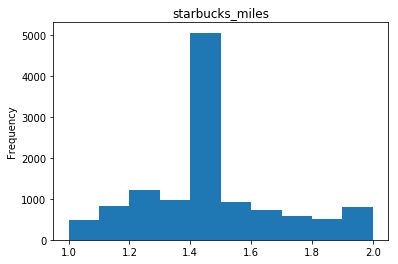


Train feature shape:  (12132, 42) (12132,)
Test feature shape:  (0, 42) (0,)
11.32 % of properties within predicted rent within 1% of actual rent
22.2 % of properties within predicted rent within 2% of actual rent
32.76 % of properties within predicted rent within 3% of actual rent
43.18 % of properties within predicted rent within 4% of actual rent
52.28 % of properties within predicted rent within 5% of actual rent
Ys SFR:  48528 48528
Input data set shape :  (12132, 48)

feature_columns :  ['Triplex', 'SFR', 'garage_no', 'fireplace_no', 'yearbuilt', 'y', 'patio_yes', 'farmers_miles', 'pool_no', 'EmploymentDiversity', 'Census_Vacancy', 'x', 'Schools', 'sqft', 'lotsize', 'cemetery_dist_miles', 'starbucks_miles', 'z', 'hospital_miles', 'Quadplex', 'opt_dist_miles', 'garage_yes', 'WhiteCollar', 'nationalhighway_miles', 'bath', 'Crime_Rate', 'Duplex', 'vet_dist_miles', 'fireplace_yes', 'walmart_miles', 'Unemployment', 'dentist_dist_miles', 'patio_no', 'halfbath', 'pool_yes', 'bed', 2015

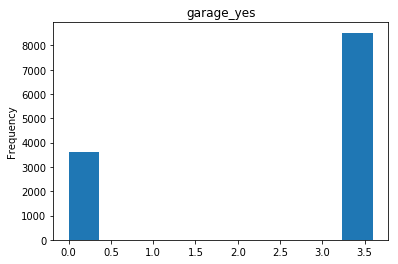


Shape of the data set before min max scaling :  (12132, 48)

Shape of the data set post min max scaling :  (12132, 48)


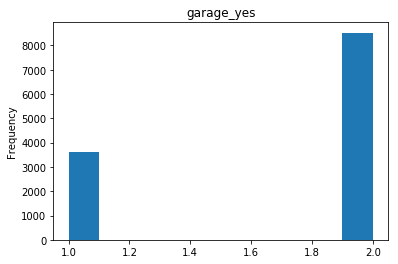


Train feature shape:  (12132, 47) (12132,)
Test feature shape:  (0, 47) (0,)
13.9 % of properties within predicted rent within 1% of actual rent
27.56 % of properties within predicted rent within 2% of actual rent
39.89 % of properties within predicted rent within 3% of actual rent
50.08 % of properties within predicted rent within 4% of actual rent
59.4 % of properties within predicted rent within 5% of actual rent
Ys gnr:  72792 72792
Input data set shape :  (12132, 48)

feature_columns :  ['Triplex', 'SFR', 'garage_no', 'fireplace_no', 'yearbuilt', 'y', 'patio_yes', 'farmers_miles', 'pool_no', 'EmploymentDiversity', 'Census_Vacancy', 'x', 'Schools', 'sqft', 'lotsize', 'cemetery_dist_miles', 'starbucks_miles', 'z', 'hospital_miles', 'Quadplex', 'opt_dist_miles', 'garage_yes', 'WhiteCollar', 'nationalhighway_miles', 'bath', 'Crime_Rate', 'Duplex', 'vet_dist_miles', 'fireplace_yes', 'walmart_miles', 'Unemployment', 'dentist_dist_miles', 'patio_no', 'halfbath', 'pool_yes', 'bed', 2015.

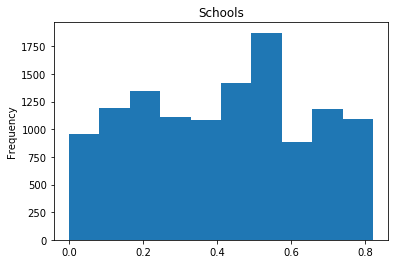


Shape of the data set before min max scaling :  (12132, 48)

Shape of the data set post min max scaling :  (12132, 48)


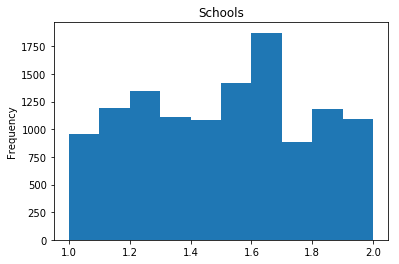


Train feature shape:  (12132, 47) (12132,)
Test feature shape:  (0, 47) (0,)
13.9 % of properties within predicted rent within 1% of actual rent
27.56 % of properties within predicted rent within 2% of actual rent
39.89 % of properties within predicted rent within 3% of actual rent
50.08 % of properties within predicted rent within 4% of actual rent
59.4 % of properties within predicted rent within 5% of actual rent
100.0 % of properties within predicted rent within 1% of actual rent
100.0 % of properties within predicted rent within 2% of actual rent
100.0 % of properties within predicted rent within 3% of actual rent
100.0 % of properties within predicted rent within 4% of actual rent
100.0 % of properties within predicted rent within 5% of actual rent


In [54]:
def checkifSepClfTest():
    clf_condo, X_condo,y_condo = sepClfForProp('Condo',2)
    clf_condo.fit(X_condo,y_condo)
    
    clf_sfr, X_sfr,y_sfr = sepClfForProp('SFR',2)
    clf_sfr.fit(X_sfr,y_sfr)
    
    clf_gnr, X_gnr, y_gnr = sepClfForProp()
    clf_gnr.fit(X_gnr, y_gnr)
    
    df = readTheData('TestData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    '''df_condo = df[df.property_type == 'Condo']
    df_sfr = df[df.property_type == 'SFR']
    #df_gnr = df[!df.property_type.isna(['Condo','SFR'])]'''
    #clf_features = ['rent','garage_no', 'fireplace_no', 'yearbuilt', 'y', 'patio_yes', 'farmers_miles', 'pool_no', 'EmploymentDiversity', 'Census_Vacancy', 'x', 'Schools', 'sqft', 'lotsize', 'starbucks_miles', 'cemetery_dist_miles', 'z', 'hospital_miles', 'opt_dist_miles', 'garage_yes', 'WhiteCollar', 'nationalhighway_miles', 'bath', 'Crime_Rate', 'vet_dist_miles', 'fireplace_yes', 'walmart_miles', 'Unemployment', 'dentist_dist_miles', 'patio_no', 'halfbath', 'pool_yes', 'bed', '2015.25', '2015.5', '2015.75', '2016.25', 'CollegeGrads', 'Census_MedianIncome', 'railline_miles', 'physician_dist_miles', 'HomePrice', 'Condo']
    #clf_features = list(X_condo)
    #clf_features.append('rent')
    
    df_test = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    df_test_copy = df_test.copy()
    df_test = df_test[df_test.SFR != 2]
    df_test = df_test[df_test.NA != 2]
    df_test = df_test[df_test.Triplex != 2]
    df_test = df_test[df_test.Quadplex != 2]
    df_test = df_test[df_test.Duplex != 2]
    df_test = df_test.drop(['SFR','NA', 'Triplex', 'Quadplex', 'Duplex'],axis=1)

    printCorr(df_test)
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    printStats(clf_condo.predict(X_train[X_condo.columns]),y_train)
    
    y_pred=y_actual = []
    y_pred += list(clf_condo.predict(X_train[X_condo.columns]))
    y_actual += list(y_train)
    print("Ys Condo: ",len(y_pred), len(y_actual))
    
    df_test = df_test_copy.copy()
    df_test = df_test[df_test.Condo != 2]
    df_test = df_test[df_test.NA != 2]
    df_test = df_test[df_test.Triplex != 2]
    df_test = df_test[df_test.Quadplex != 2]
    df_test = df_test[df_test.Duplex != 2]
    df_test = df_test.drop(['Condo','NA', 'Triplex', 'Quadplex', 'Duplex'],axis=1)
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    printStats(clf_sfr.predict(X_train[X_sfr.columns]),y_train)
    
    y_pred += list(clf_sfr.predict(X_train[X_sfr.columns]))
    y_actual += list(y_train)
    print("Ys SFR: ",len(y_pred), len(y_actual))

    df_test = df_test_copy.copy()
    df_test = df_test[df_test.Condo != 2]
    df_test = df_test[df_test.SFR != 2]

    #df_test = df_test.drop(['Condo','SFR'],axis=1)
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    printStats(clf_gnr.predict(X_train[X_gnr.columns]),y_train)
    
    y_pred += list(clf_gnr.predict(X_train[X_gnr.columns]))
    y_actual += list(y_train)
    print("Ys gnr: ",len(y_pred), len(y_actual))
    
    
    df_test = df_test_copy.copy()
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    printStats(clf_gnr.predict(X_train[X_gnr.columns]),y_train)
    
    
    printStats(y_pred, y_actual)
checkifSepClfTest()

##### Need to check what went wrong in calculating the overall %. But 59.4% for +- 5% without hyper parameter tuning is good. Need to continue with stacked approach. Not sure I understand the concept very well so far.

Shape of the data set before transforming :  (12132, 40)
Shape of the data set after transforming :  (12132, 44) 


Shape of the data set before creating dummies :  (12132, 44)
Shape of the data set post creating dummies :  (12132, 48)

Shape of the dataset before transformation :  (12132, 48)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'yearbuilt', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate', 'HomePrice', 'rent', 'x', 'y', 'z', 2015.25, 2015.5, 2015.75, 2016.25, 'Condo', 'Duplex', 'NA', 'Quadplex', 'SFR', 'Triplex', 'garage_no', 'garage_yes', 'pool_no', 'pool_yes', 'fireplace_no', 'fireplace_yes', 'patio_no', '

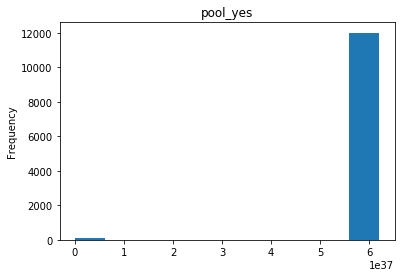


Shape of the data set before min max scaling :  (12132, 48)

Shape of the data set post min max scaling :  (12132, 48)


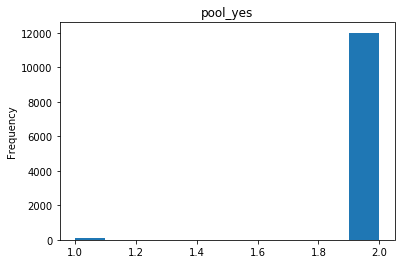


Train feature shape:  (12132, 47) (12132,)
Test feature shape:  (0, 47) (0,)
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dataset before transformation :  (18079, 48)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_

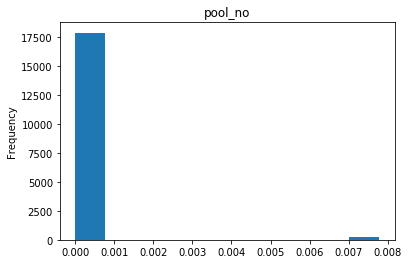


Shape of the data set before min max scaling :  (18079, 48)

Shape of the data set post min max scaling :  (18079, 48)


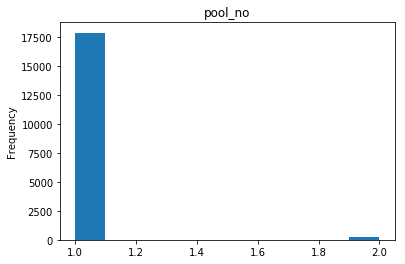


Train feature shape:  (14463, 47) (14463,)
Test feature shape:  (3616, 47) (3616,)

With estimator = 2 , Validation Score : 0.7812927972217146 , Testing Score : 0.7362084166947817
As per Competetion Evaluation Metrics : 
12.77 % of properties within predicted rent within 1% of actual rent
25.27 % of properties within predicted rent within 2% of actual rent
37.1 % of properties within predicted rent within 3% of actual rent
47.64 % of properties within predicted rent within 4% of actual rent
56.5 % of properties within predicted rent within 5% of actual rent

With estimator = 2 , Validation Score : 0.8039476167330787 , Testing Score : 0.7564162920983237
As per Competetion Evaluation Metrics : 
14.04 % of properties within predicted rent within 1% of actual rent
27.04 % of properties within predicted rent within 2% of actual rent
38.97 % of properties within predicted rent within 3% of actual rent
49.43 % of properties within predicted rent within 4% of actual rent
58.86 % of properties


With estimator = 4 , Validation Score : 0.8500630734852033 , Testing Score : 0.7993508246849726
As per Competetion Evaluation Metrics : 
15.28 % of properties within predicted rent within 1% of actual rent
30.3 % of properties within predicted rent within 2% of actual rent
43.92 % of properties within predicted rent within 3% of actual rent
54.93 % of properties within predicted rent within 4% of actual rent
64.17 % of properties within predicted rent within 5% of actual rent

With estimator = 4 , Validation Score : 0.8518269973441336 , Testing Score : 0.8002960331676101
As per Competetion Evaluation Metrics : 
15.41 % of properties within predicted rent within 1% of actual rent
30.23 % of properties within predicted rent within 2% of actual rent
44.08 % of properties within predicted rent within 3% of actual rent
55.0 % of properties within predicted rent within 4% of actual rent
64.42 % of properties within predicted rent within 5% of actual rent

With estimator = 4 , Validation Sco


With estimator = 6 , Validation Score : 0.8626387251217692 , Testing Score : 0.8054446225877856
As per Competetion Evaluation Metrics : 
15.99 % of properties within predicted rent within 1% of actual rent
31.07 % of properties within predicted rent within 2% of actual rent
44.55 % of properties within predicted rent within 3% of actual rent
55.98 % of properties within predicted rent within 4% of actual rent
65.46 % of properties within predicted rent within 5% of actual rent

With estimator = 7 , Validation Score : 0.849575664798622 , Testing Score : 0.7972840417956999
As per Competetion Evaluation Metrics : 
15.79 % of properties within predicted rent within 1% of actual rent
30.28 % of properties within predicted rent within 2% of actual rent
43.6 % of properties within predicted rent within 3% of actual rent
54.32 % of properties within predicted rent within 4% of actual rent
63.78 % of properties within predicted rent within 5% of actual rent

With estimator = 7 , Validation Sco


With estimator = 9 , Validation Score : 0.8602229743143606 , Testing Score : 0.8115147097518318
As per Competetion Evaluation Metrics : 
16.85 % of properties within predicted rent within 1% of actual rent
32.11 % of properties within predicted rent within 2% of actual rent
45.24 % of properties within predicted rent within 3% of actual rent
56.78 % of properties within predicted rent within 4% of actual rent
65.85 % of properties within predicted rent within 5% of actual rent

With estimator = 9 , Validation Score : 0.8606044562905021 , Testing Score : 0.8114354045356952
As per Competetion Evaluation Metrics : 
16.74 % of properties within predicted rent within 1% of actual rent
32.04 % of properties within predicted rent within 2% of actual rent
45.39 % of properties within predicted rent within 3% of actual rent
56.84 % of properties within predicted rent within 4% of actual rent
66.02 % of properties within predicted rent within 5% of actual rent

With estimator = 9 , Validation S


With estimator = 11 , Validation Score : 0.8585880091496432 , Testing Score : 0.809427452005606
As per Competetion Evaluation Metrics : 
16.47 % of properties within predicted rent within 1% of actual rent
31.51 % of properties within predicted rent within 2% of actual rent
45.6 % of properties within predicted rent within 3% of actual rent
56.83 % of properties within predicted rent within 4% of actual rent
66.13 % of properties within predicted rent within 5% of actual rent

With estimator = 11 , Validation Score : 0.85858020344677 , Testing Score : 0.8091265624892638
As per Competetion Evaluation Metrics : 
16.48 % of properties within predicted rent within 1% of actual rent
31.54 % of properties within predicted rent within 2% of actual rent
45.52 % of properties within predicted rent within 3% of actual rent
56.75 % of properties within predicted rent within 4% of actual rent
66.01 % of properties within predicted rent within 5% of actual rent

With estimator = 12 , Validation Sc


With estimator = 14 , Validation Score : 0.8508010643849341 , Testing Score : 0.8089468030244663
As per Competetion Evaluation Metrics : 
16.21 % of properties within predicted rent within 1% of actual rent
31.69 % of properties within predicted rent within 2% of actual rent
45.13 % of properties within predicted rent within 3% of actual rent
56.26 % of properties within predicted rent within 4% of actual rent
65.84 % of properties within predicted rent within 5% of actual rent

With estimator = 14 , Validation Score : 0.8511637914348289 , Testing Score : 0.8086911587050907
As per Competetion Evaluation Metrics : 
16.2 % of properties within predicted rent within 1% of actual rent
31.73 % of properties within predicted rent within 2% of actual rent
45.05 % of properties within predicted rent within 3% of actual rent
56.12 % of properties within predicted rent within 4% of actual rent
65.84 % of properties within predicted rent within 5% of actual rent

With estimator = 14 , Validation

In [59]:
def doGridSearch(i,j,X_train,y_train,X_test,y_test,X,y):

    my_model = XGBRegressor(max_depth=i,n_estimators=j)
    my_model.fit(X_train,y_train)

    print("\nWith estimator =",i,", Validation Score :",my_model.score(X_test,y_test), ", Testing Score :",my_model.score(X,y))
    print("As per Competetion Evaluation Metrics : ")
    printStats(my_model.predict(X),y)
    
    return my_model.score(X_test,y_test), my_model.score(X,y)
        
def loopGridSearch():
    valid_score=[]
    test_score =[]
    max_depth = []
    n_estimator = []
    
    df = readTheData('TestData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df_test = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    
    X, y, dummy_test_x, dummy_text_y = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    #get the training data
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .8,
            random.randint(1,1000))
    
    
    for i in range(2,15,1):
        for j in range(100,800,100):
            valid_s, test_s = doGridSearch(i,j,X_train,y_train,X_test,y_test,X,y)
            valid_score.append(valid_s)
            test_score.append(test_s)
            max_depth.append(i)
            n_estimator.append(j)
    
    plt_df = pd.DataFrame({'max_depth': max_depth,
                           'n_estimator': n_estimator,
                            'valid_score' : valid_score,
                            'test_score' : test_score,
                        })
    return plt_df

df_grid = loopGridSearch()
    

In [60]:
df_grid.head()

,max_depth,n_estimator,valid_score,test_score
0,2,100,0.781293,0.736208
1,2,200,0.803948,0.756416
2,2,300,0.814042,0.766226
3,2,400,0.820291,0.772616
4,2,500,0.824406,0.774950


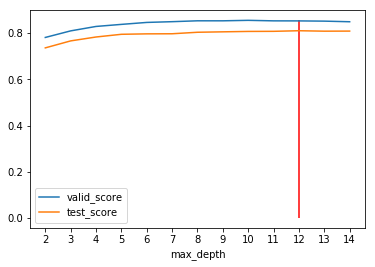

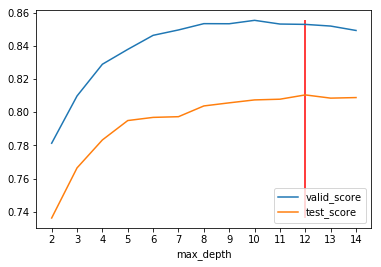

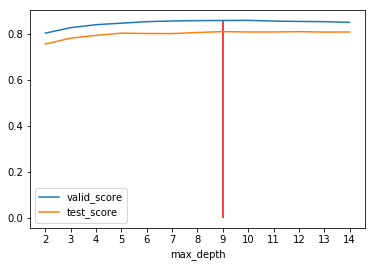

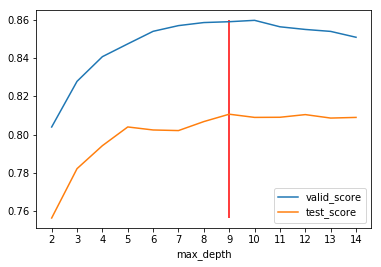

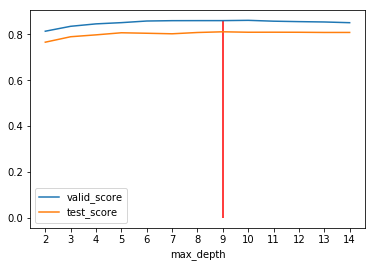

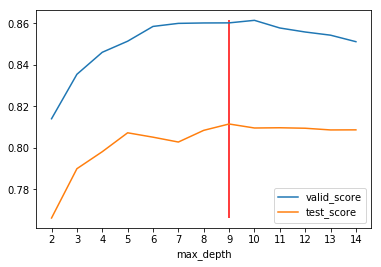

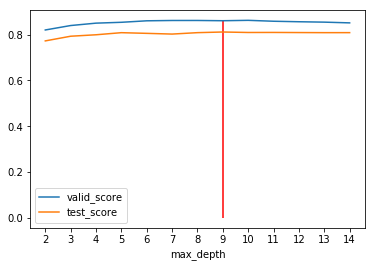

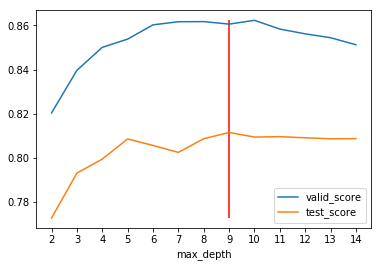

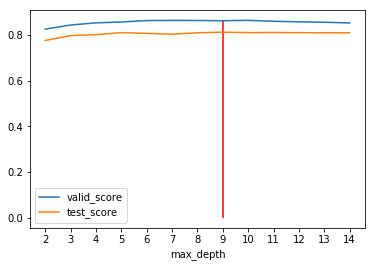

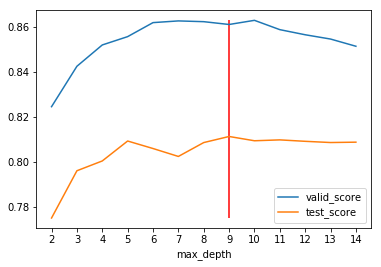

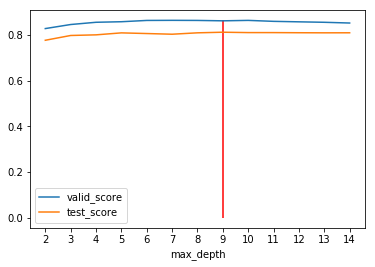

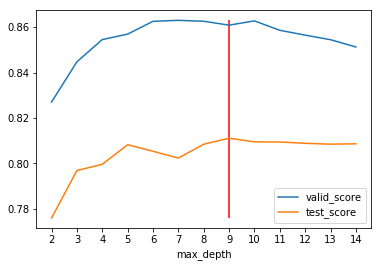

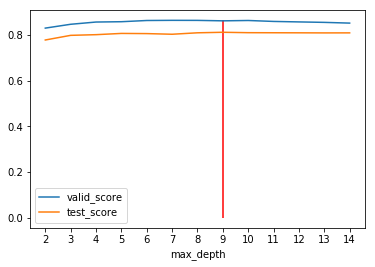

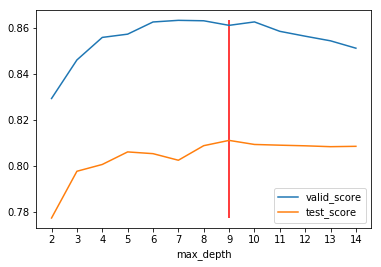

In [66]:
for i in df_grid.n_estimator.unique().tolist():
    plotDf(df_grid[df_grid.n_estimator == i])
    plotDf(df_grid[df_grid.n_estimator == i],0)

In [67]:
df_grid[df_grid.test_score == df_grid.test_score.max()]

,max_depth,n_estimator,valid_score,test_score
51,9,300,0.860223,0.811515


* With estimator = 9 , Validation Score : 0.8602229743143606 , Testing Score : 0.8115147097518318
* As per Competetion Evaluation Metrics : 
  * 16.85 % of properties within predicted rent within 1% of actual rent
  * 32.11 % of properties within predicted rent within 2% of actual rent
  * 45.24 % of properties within predicted rent within 3% of actual rent
  * 56.78 % of properties within predicted rent within 4% of actual rent
  * 65.85 % of properties within predicted rent within 5% of actual rent

##### Before going further let us check if we can get the actual rent back from our transformations.

##### https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard approach of stacking !!!

In [ ]:
def trytheStackedWay():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    
    train, y_train, test, y_test = returnTrainTestSet(
            df,
            .8,
            random.randint(1,1000))
    
    train = pd.DataFrame(np.array(train,dtype='float32'),columns =train.columns)
    test = pd.DataFrame(np.array(test,dtype='float32'),columns =test.columns)
    #Validation function
    n_folds = 5

    def rmsle_cv(model):
        kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
        rmse= np.float64(np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf)))
        return(rmse)

    lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                       max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10, 
                                       loss='huber', random_state =5)

    class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
        def __init__(self, base_models, meta_model, n_folds=5):
            self.base_models = base_models
            self.meta_model = meta_model
            self.n_folds = n_folds

        # We again fit the data on clones of the original models
        def fit(self, X, y):
            self.base_models_ = [list() for x in self.base_models]
            self.meta_model_ = clone(self.meta_model)
            kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

            # Train cloned base models then create out-of-fold predictions
            # that are needed to train the cloned meta-model
            out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
            for i, model in enumerate(self.base_models):
                for train_index, holdout_index in kfold.split(X, y):
                    instance = clone(model)
                    self.base_models_[i].append(instance)
                    instance.fit(X[train_index], y[train_index])
                    y_pred = instance.predict(X[holdout_index])
                    out_of_fold_predictions[holdout_index, i] = y_pred

            # Now train the cloned  meta-model using the out-of-fold predictions as new feature
            self.meta_model_.fit(out_of_fold_predictions, y)
            return self

        #Do the predictions of all base models on the test data and use the averaged predictions as 
        #meta-features for the final prediction which is done by the meta-model
        def predict(self, X):
            meta_features = np.column_stack([
                np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
                for base_models in self.base_models_ ])
            return self.meta_model_.predict(meta_features)


    stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                     meta_model = lasso)
    def rmsle(y, y_pred):
        return np.sqrt(mean_squared_error(y, y_pred))

    score = rmsle_cv(stacked_averaged_models)
    print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

    stacked_averaged_models.fit(train.values, y_train)
    stacked_train_pred = stacked_averaged_models.predict(train.values)
    stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
    print(rmsle(y_train, stacked_train_pred))
    
trytheStackedWay()

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 


Shape of the data set before creating dummies :  (18079, 44)
Shape of the data set post creating dummies :  (18079, 48)

Shape of the dataset before transformation :  (18079, 48)
Ignoring the columns.... []
Performing column transformations for : ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_mil